# Step 0 Load Dataset
- In this step, you use pandas to load `train_data_ads.csv` and `train_data_feeds.csv` as a panda dataframe.
- Source: https://colab.research.google.com/drive/1hzpIXsnND-pn6QnGnqJXwllFlHiO8A-d#scrollTo=JVpsdm1lrX-H 

In [3]:
import pandas as pd 
df_ads = pd.read_csv('../Data/train_data_ads.csv')
df_feeds = pd.read_csv('../Data/train_data_feeds.csv')
print("data is loaded...") # 31.8 s

data is loaded...


# Step 1 Explore The Dataset

For each table, answer the following questions:
- Exercise 1.1: Print the dimension of the dataframe
- Exercise 1.2: Print the column name of the dataframe
- Exercise 1.3: Sort the columns based on their number of unique values

In [14]:
def describe_dataframe(df):
    # Solution 1.1: Get the shape of the DataFrame
    shape_description = "(I) Shape of the DataFrame:\n"
    shape_description += f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.\n\n"

    # Solution 1.2: Get the columns of the DataFrame and format them
    columns = df.columns.tolist()
    columns_description = "(II) Columns of the DataFrame:\n"
    for i in range(0, len(columns), 5):
        columns_description += ", ".join(columns[i:i+5]) + "\n"
    columns_description += "\n"

    # Solution 1.3: Get the number of unique values for each column, sorted by value
    unique_values = df.nunique().sort_values()
    unique_values_description = "(III) Number of unique values per column (sorted in ascending order):\n"
    unique_values_list = [f"{col}: {unique_values[col]}" for col in unique_values.index]
    for i in range(0, len(unique_values_list), 5):
        unique_values_description += ", ".join(unique_values_list[i:i+5]) + "\n"

    # Combine all descriptions
    full_description = f"{shape_description}{columns_description}{unique_values_description}"

    return full_description

## Answer to Ads Table

In [17]:
# Example usage
# Assuming df_ads is your DataFrame
description_ads = describe_dataframe(df_ads)
print(description_ads)

(I) Shape of the DataFrame:
The DataFrame has 7675517 rows and 35 columns.

(II) Columns of the DataFrame:
log_id, label, user_id, age, gender
residence, city, city_rank, series_dev, series_group
emui_dev, device_name, device_size, net_type, task_id
adv_id, creat_type_cd, adv_prim_id, inter_type_cd, slot_id
site_id, spread_app_id, hispace_app_tags, app_second_class, app_score
ad_click_list_v001, ad_click_list_v002, ad_click_list_v003, ad_close_list_v001, ad_close_list_v002
ad_close_list_v003, pt_d, u_newsCatInterestsST, u_refreshTimes, u_feedLifeCycle

(III) Number of unique values per column (sorted in ascending order):
site_id: 1, label: 2, app_score: 3, gender: 3, inter_type_cd: 4
city_rank: 4, net_type: 6, series_group: 7, u_feedLifeCycle: 8, age: 8
creat_type_cd: 9, u_refreshTimes: 10, app_second_class: 20, series_dev: 27, emui_dev: 27
residence: 35, hispace_app_tags: 43, slot_id: 60, spread_app_id: 116, device_name: 256
city: 341, adv_prim_id: 545, device_size: 1547, ad_close_lis

## Answer to Feeds Table

In [18]:
# Example usage
# Assuming df_feeds is your DataFrame
description_feeds = describe_dataframe(df_feeds)
print(description_feeds)

(I) Shape of the DataFrame:
The DataFrame has 3227732 rows and 28 columns.

(II) Columns of the DataFrame:
u_userId, u_phonePrice, u_browserLifeCycle, u_browserMode, u_feedLifeCycle
u_refreshTimes, u_newsCatInterests, u_newsCatDislike, u_newsCatInterestsST, u_click_ca2_news
i_docId, i_s_sourceId, i_regionEntity, i_cat, i_entities
i_dislikeTimes, i_upTimes, i_dtype, e_ch, e_m
e_po, e_pl, e_rn, e_section, e_et
label, cillabel, pro

(III) Number of unique values per column (sorted in ascending order):
label: 2, e_section: 2, cillabel: 2, i_dtype: 5, u_phonePrice: 7
u_browserLifeCycle: 8, u_browserMode: 8, u_feedLifeCycle: 8, u_refreshTimes: 10, i_upTimes: 10
i_dislikeTimes: 10, e_ch: 19, e_po: 27, pro: 85, e_rn: 99
i_cat: 208, e_m: 274, i_regionEntity: 378, u_newsCatDislike: 810, e_pl: 3113
e_et: 3663, i_s_sourceId: 4040, i_entities: 92746, i_docId: 98600, u_userId: 180123
u_newsCatInterests: 202636, u_newsCatInterestsST: 625044, u_click_ca2_news: 758921



# Step 2 Check user ID in both Tables

- 36.25% of User ID are potential customers (who do click ads)
- 63.75% of User ID are ad viewers without engagement (who didn't click ads)

In [25]:
def describe_common_ids(df_ads, df_feeds):
    # Solution 1: Print the number of unique matching IDs in both datasets
    unique_ads_ids = len(df_ads['user_id'].unique())
    unique_feeds_ids = len(df_feeds['u_userId'].unique())
    
    print(f"(I) Number of unique matching IDs:")
    print(f"    - Ads dataset: {unique_ads_ids}")
    print(f"    - Feeds dataset: {unique_feeds_ids}\n")

    # Solution 2: Find common IDs between both datasets
    ads_ids = set(df_ads['user_id'].unique())
    feeds_ids = set(df_feeds['u_userId'].unique())
    common_ids = ads_ids.intersection(feeds_ids)
    common_ids_count = len(common_ids)
    
    ads_common_percentage = (common_ids_count / unique_ads_ids) * 100
    feeds_common_percentage = (common_ids_count / unique_feeds_ids) * 100
    
    print(f"(II) Common IDs for data collaboration:")
    print(f"    - There are {common_ids_count} common IDs in both tables.")
    print(f"    - This represents {ads_common_percentage:.2f}% of the IDs in the ads dataset")
    print(f"    - And {feeds_common_percentage:.2f}% of the IDs in the feeds dataset.\n")

    # Solution 3: Define ad views without engagement and potential customers
    ad_views_without_engagement = feeds_ids - ads_ids
    potential_customers = common_ids
    
    total_unique_ids = unique_feeds_ids
    ad_views_without_engagement_percentage = (len(ad_views_without_engagement) / total_unique_ids) * 100
    potential_customers_percentage = (len(potential_customers) / total_unique_ids) * 100
    
    print(f"(III) Ad Views Without Engagement and Potential Customers:")
    print(f"    - Ad views without engagement: {len(ad_views_without_engagement)} ({ad_views_without_engagement_percentage:.2f}% of the total unique IDs)")
    print(f"    - Potential customers: {len(potential_customers)} ({potential_customers_percentage:.2f}% of the total unique IDs)\n")

# Example usage
# Assuming df_ads and df_feeds are your DataFrames
describe_common_ids(df_ads, df_feeds)

(I) Number of unique matching IDs:
    - Ads dataset: 65297
    - Feeds dataset: 180123

(II) Common IDs for data collaboration:
    - There are 65297 common IDs in both tables.
    - This represents 100.00% of the IDs in the ads dataset
    - And 36.25% of the IDs in the feeds dataset.

(III) Ad Views Without Engagement and Potential Customers:
    - Ad views without engagement: 114826 (63.75% of the total unique IDs)
    - Potential customers: 65297 (36.25% of the total unique IDs)



# Step 3 Visualize the results

Ad views without engagement: 114826 (63.75% of the total unique IDs)
Potential customers: 65297 (36.25% of the total unique IDs)


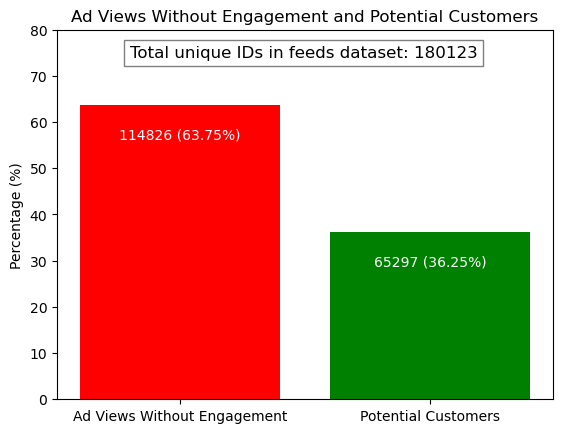

In [38]:
import matplotlib.pyplot as plt

def calculate_and_visualize_common_ids(df_ads, df_feeds):
    # Find unique IDs in both datasets
    ads_ids = set(df_ads['user_id'].unique())
    feeds_ids = set(df_feeds['u_userId'].unique())
    common_ids = ads_ids.intersection(feeds_ids)
    
    # Define ad views without engagement and potential customers
    ad_views_without_engagement = feeds_ids - ads_ids
    potential_customers = common_ids
    
    total_unique_ids = len(feeds_ids)
    ad_views_without_engagement_count = len(ad_views_without_engagement)
    potential_customers_count = len(potential_customers)
    
    ad_views_without_engagement_percentage = (ad_views_without_engagement_count / total_unique_ids) * 100
    potential_customers_percentage = (potential_customers_count / total_unique_ids) * 100

    # Print the percentages
    print(f"Ad views without engagement: {ad_views_without_engagement_count} ({ad_views_without_engagement_percentage:.2f}% of the total unique IDs)")
    print(f"Potential customers: {potential_customers_count} ({potential_customers_percentage:.2f}% of the total unique IDs)")

    # Visualization
    labels = ['Ad Views Without Engagement', 'Potential Customers']
    counts = [ad_views_without_engagement_count, potential_customers_count]
    percentages = [ad_views_without_engagement_percentage, potential_customers_percentage]

    fig, ax = plt.subplots()

    bars = ax.bar(labels, percentages, color=['red', 'green'])
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 80)
    ax.set_title('Ad Views Without Engagement and Potential Customers')

    for bar, count, percentage in zip(bars, counts, percentages):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f"{count} ({percentage:.2f}%)", ha='center', va='top', color='white')

    total_text = f"Total unique IDs in feeds dataset: {total_unique_ids}"
    plt.text(-0.2, 75, total_text, ha='left', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

# Example usage
# Assuming df_ads and df_feeds are your DataFrames
calculate_and_visualize_common_ids(df_ads, df_feeds)
